In [ ]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
import nltk
nltk.download('all')
import string
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from imblearn.under_sampling import RandomUnderSampler

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [ ]:
#Import train Dataset
train=pd.read_csv('/content/train.csv')

In [ ]:
#Import test Dataset
test=pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,id,tid1,tid2,title1_en,title2_en,label
0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated
4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated


In [ ]:
train.shape

(256442, 6)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256442 entries, 0 to 256441
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         256442 non-null  int64 
 1   tid1       256442 non-null  int64 
 2   tid2       256442 non-null  int64 
 3   title1_en  256442 non-null  object
 4   title2_en  256442 non-null  object
 5   label      256442 non-null  object
dtypes: int64(3), object(3)
memory usage: 11.7+ MB


In [ ]:
train.isna().sum()

id           0
tid1         0
tid2         0
title1_en    0
title2_en    0
label        0
dtype: int64

In [ ]:
print(train.groupby('label').size())

label
agreed        74238
disagreed      6606
unrelated    175598
dtype: int64


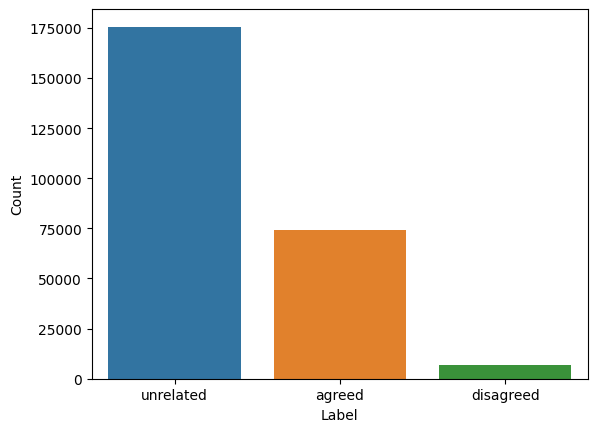

In [ ]:
sns.countplot(x="label",data=train)
plt.ylabel("Count")
plt.xlabel("Label")
plt.show()

In [ ]:
#Before text processing train data
print(train['title1_en'].iloc[0])
print(train['title2_en'].iloc[0])

There are two new old-age insurance benefits for old people in rural areas. Have you got them?
Police disprove "bird's nest congress each person gets 50,000 yuan" still old people insist on going to beijing


In [ ]:
#Before text processing test data
print(test['title1_en'].iloc[0])
print(test['title2_en'].iloc[0])

The great coat brother Zhu Zhu Wen, in the mandarin love song to sing the song is really the lanca- talent is very sweet!
Lin xinsheng after the birth of "hard milking," Huo jianhua is not seen, "forced marriage" is real?


In [ ]:
#Convert Lowercase
train["title1_en"] = train["title1_en"].str.lower()
train["title2_en"] = train["title2_en"].str.lower()
print(train['title1_en'].iloc[0])
print(train['title2_en'].iloc[0])

there are two new old-age insurance benefits for old people in rural areas. have you got them?
police disprove "bird's nest congress each person gets 50,000 yuan" still old people insist on going to beijing


In [ ]:
#Convert Lowercase
test["title1_en"] = test["title1_en"].str.lower()
test["title2_en"] = test["title2_en"].str.lower()
print(test['title1_en'].iloc[0])
print(test['title2_en'].iloc[0])

the great coat brother zhu zhu wen, in the mandarin love song to sing the song is really the lanca- talent is very sweet!
lin xinsheng after the birth of "hard milking," huo jianhua is not seen, "forced marriage" is real?


In [ ]:
#Remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
train["title1_en"] = train["title1_en"].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
train["title2_en"] = train["title2_en"].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
print(train['title1_en'].iloc[0])
print(train['title2_en'].iloc[0])

two new old-age insurance benefits old people rural areas. got them?
police disprove "bird's nest congress person gets 50,000 yuan" still old people insist going beijing


In [ ]:
#Remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
test["title1_en"] = test["title1_en"].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
test["title2_en"] = test["title2_en"].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
print(test['title1_en'].iloc[0])
print(test['title2_en'].iloc[0])

great coat brother zhu zhu wen, mandarin love song sing song really lanca- talent sweet!
lin xinsheng birth "hard milking," huo jianhua seen, "forced marriage" real?


In [ ]:
#Strip whitespace
train["title1_en"] = train["title1_en"].str.strip()
train["title2_en"] = train["title2_en"].str.strip()
print(train['title1_en'].iloc[0])
print(train['title2_en'].iloc[0])

two new old-age insurance benefits old people rural areas. got them?
police disprove "bird's nest congress person gets 50,000 yuan" still old people insist going beijing


In [ ]:
#Strip whitespace
test["title1_en"] = test["title1_en"].str.strip()
test["title2_en"] = test["title2_en"].str.strip()
print(test['title1_en'].iloc[0])
print(test['title2_en'].iloc[0])

great coat brother zhu zhu wen, mandarin love song sing song really lanca- talent sweet!
lin xinsheng birth "hard milking," huo jianhua seen, "forced marriage" real?


In [ ]:
#Remove punctuation
import string
string.punctuation
train["title1_en"] = train["title1_en"].apply(lambda x: ''.join([word for word in str(x) if word not in (string.punctuation)]))
train["title2_en"] = train["title2_en"].apply(lambda x: ''.join([word for word in str(x) if word not in (string.punctuation)]))
print(train['title1_en'].iloc[0])
print(train['title2_en'].iloc[0])

two new oldage insurance benefits old people rural areas got them
police disprove birds nest congress person gets 50000 yuan still old people insist going beijing


In [ ]:
#Remove punctuation
import string
string.punctuation
test["title1_en"] = test["title1_en"].apply(lambda x: ''.join([word for word in str(x) if word not in (string.punctuation)]))
test["title2_en"] = test["title2_en"].apply(lambda x: ''.join([word for word in str(x) if word not in (string.punctuation)]))
print(test['title1_en'].iloc[0])
print(test['title2_en'].iloc[0])

great coat brother zhu zhu wen mandarin love song sing song really lanca talent sweet
lin xinsheng birth hard milking huo jianhua seen forced marriage real


In [ ]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
train["title1_en"] = train["title1_en"].apply(lambda x: ' '.join([lemm.lemmatize(word) for word in str(x).split()]))
train["title2_en"] = train["title2_en"].apply(lambda x: ' '.join([lemm.lemmatize(word) for word in str(x).split()]))
print(train['title1_en'].iloc[0])
print(train['title2_en'].iloc[0])

two new oldage insurance benefit old people rural area got them
police disprove bird nest congress person get 50000 yuan still old people insist going beijing


In [ ]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
test["title1_en"] = test["title1_en"].apply(lambda x: ' '.join([lemm.lemmatize(word) for word in str(x).split()]))
test["title2_en"] = test["title2_en"].apply(lambda x: ' '.join([lemm.lemmatize(word) for word in str(x).split()]))
print(test['title1_en'].iloc[0])
print(test['title2_en'].iloc[0])

great coat brother zhu zhu wen mandarin love song sing song really lanca talent sweet
lin xinsheng birth hard milking huo jianhua seen forced marriage real


In [ ]:
#After text processing train data
print(train['title1_en'].iloc[0])
print(train['title2_en'].iloc[0])

two new oldage insurance benefit old people rural area got them
police disprove bird nest congress person get 50000 yuan still old people insist going beijing


In [ ]:
#After text processing test data
print(test['title1_en'].iloc[0])
print(test['title2_en'].iloc[0])

great coat brother zhu zhu wen mandarin love song sing song really lanca talent sweet
lin xinsheng birth hard milking huo jianhua seen forced marriage real


In [ ]:
X = train['title1_en'] + '' + train['title2_en']
y = train['label']

In [ ]:
X[0]

'two new oldage insurance benefit old people rural area got thempolice disprove bird nest congress person get 50000 yuan still old people insist going beijing'

In [ ]:
X.head(5)

0    two new oldage insurance benefit old people ru...
1    if come shenzhen sooner later son also come le...
2    if come shenzhen sooner later son also come le...
3    if come shenzhen sooner later son also come le...
4    if come shenzhen sooner later son also come le...
dtype: object

In [ ]:
vectorizer =TfidfVectorizer(stop_words= 'english')

In [ ]:
#Create 80% train test and 20% validation test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(205153, 171130) (51289, 171130) (205153,) (51289,)


In [ ]:
#Logistic Regression Model
lr = LogisticRegression(max_iter = 500)
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)
print(classification_report(Y_test, Y_pred_lr))
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_lr)))
#Recall score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_lr,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_lr,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_lr,average='weighted')))
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

      agreed       0.75      0.60      0.67     14813
   disagreed       0.77      0.19      0.30      1321
   unrelated       0.82      0.92      0.87     35155

    accuracy                           0.80     51289
   macro avg       0.78      0.57      0.61     51289
weighted avg       0.80      0.80      0.79     51289

Accuracy Score: 0.8047534559067246
Recall Score: 0.8047534559067246
Precision Score: 0.7994297392962509
F1 Score: 0.7933414033568648
[[ 8854    11  5948]
 [   45   245  1031]
 [ 2915    64 32176]]


In [ ]:
#Multinomial NaiveBayes Model
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)
Y_pred_mnb = mnb.predict(X_test)
print(classification_report(Y_test, Y_pred_mnb))
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_mnb)))
#Recall score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_mnb,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_mnb,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_mnb,average='weighted')))
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred_mnb))

              precision    recall  f1-score   support

      agreed       0.87      0.22      0.35     14813
   disagreed       1.00      0.01      0.02      1321
   unrelated       0.73      0.99      0.84     35155

    accuracy                           0.74     51289
   macro avg       0.87      0.41      0.40     51289
weighted avg       0.78      0.74      0.68     51289

Accuracy Score: 0.7395932851098677
Recall Score: 0.7395932851098677
Precision Score: 0.7770855932526382
F1 Score: 0.6763328701079517
[[ 3240     0 11573]
 [    4    15  1302]
 [  477     0 34678]]


In [ ]:
#LinearSVC
svc = LinearSVC()
svc.fit(X_train,Y_train)
Y_pred_svc = svc.predict(X_test)
print(classification_report(Y_test, Y_pred_svc))
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_svc)))
#Recall score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_svc,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_svc,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_svc,average='weighted')))
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred_svc))

              precision    recall  f1-score   support

      agreed       0.76      0.66      0.70     14813
   disagreed       0.73      0.25      0.38      1321
   unrelated       0.84      0.91      0.87     35155

    accuracy                           0.82     51289
   macro avg       0.78      0.61      0.65     51289
weighted avg       0.81      0.82      0.81     51289

Accuracy Score: 0.8194739612782468
Recall Score: 0.8194739612782468
Precision Score: 0.814375593526316
F1 Score: 0.8120243238968857
[[ 9731    17  5065]
 [   52   334   935]
 [ 3085   105 31965]]


In [ ]:
#DecisionTreeClassifier Model
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(classification_report(Y_test, Y_pred_dt))
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_dt)))
#Recall score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_dt,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_dt,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_dt,average='weighted')))
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred_dt))

              precision    recall  f1-score   support

      agreed       0.65      0.66      0.65     14813
   disagreed       0.42      0.36      0.39      1321
   unrelated       0.83      0.83      0.83     35155

    accuracy                           0.77     51289
   macro avg       0.63      0.62      0.62     51289
weighted avg       0.77      0.77      0.77     51289

Accuracy Score: 0.7699701690420948
Recall Score: 0.7699701690420948
Precision Score: 0.7696022323865177
F1 Score: 0.7697212175624862
[[ 9753    51  5009]
 [   57   481   783]
 [ 5279   619 29257]]


In [ ]:
#RandomForestClassifier Model
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
print(classification_report(Y_test, Y_pred_rf))
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_rf)))
#Recall score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_rf,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_rf,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_rf,average='weighted')))
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

      agreed       0.83      0.69      0.75     14813
   disagreed       0.83      0.26      0.39      1321
   unrelated       0.86      0.94      0.90     35155

    accuracy                           0.85     51289
   macro avg       0.84      0.63      0.68     51289
weighted avg       0.85      0.85      0.84     51289

Accuracy Score: 0.8501823002983095
Recall Score: 0.8501823002983095
Precision Score: 0.8484542597100638
F1 Score: 0.8421384694873852
[[10203    13  4597]
 [   26   338   957]
 [ 2033    58 33064]]


In [ ]:
#Undersampling data
rus = RandomUnderSampler()
X_rus, Y_rus = rus.fit_resample(X_train, Y_train)
Y_rus.value_counts()

agreed       5285
disagreed    5285
unrelated    5285
Name: label, dtype: int64

In [ ]:
#Logistic Regression Model
lr_rus = LogisticRegression(max_iter=500)
lr_rus.fit(X_rus,Y_rus)
Y_pred_lr_rus = lr_rus.predict(X_test)
print(classification_report(Y_test, Y_pred_lr_rus))
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_lr_rus)))
#Recall score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_lr_rus,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_lr_rus,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_lr_rus,average='weighted')))
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred_lr_rus))

              precision    recall  f1-score   support

      agreed       0.48      0.76      0.59     14813
   disagreed       0.13      0.81      0.22      1321
   unrelated       0.83      0.46      0.59     35155

    accuracy                           0.56     51289
   macro avg       0.48      0.68      0.47     51289
weighted avg       0.71      0.56      0.58     51289

Accuracy Score: 0.5564546004016456
Recall Score: 0.5564546004016456
Precision Score: 0.7141496229686666
F1 Score: 0.5824463999296245
[[11306   481  3026]
 [   78  1067   176]
 [12149  6839 16167]]


In [ ]:
#Multinomial NaiveBayes Model
mnb_rus = MultinomialNB()
mnb_rus.fit(X_rus,Y_rus)
Y_pred_mnb_rus = mnb_rus.predict(X_test)
print(classification_report(Y_test, Y_pred_mnb_rus))
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_mnb_rus)))
#Recall score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_mnb_rus,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_mnb_rus,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_mnb_rus,average='weighted')))
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred_mnb_rus))

              precision    recall  f1-score   support

      agreed       0.49      0.69      0.57     14813
   disagreed       0.11      0.79      0.20      1321
   unrelated       0.83      0.49      0.62     35155

    accuracy                           0.56     51289
   macro avg       0.48      0.66      0.46     51289
weighted avg       0.71      0.56      0.59     51289

Accuracy Score: 0.5601006063678372
Recall Score: 0.5601006063678372
Precision Score: 0.7098474145492171
F1 Score: 0.594693119573099
[[10294  1078  3441]
 [   53  1046   222]
 [10778  6990 17387]]


In [ ]:
#LinearSVC
svc_rus = LinearSVC()
svc_rus.fit(X_rus,Y_rus)
Y_pred_svc_rus = svc_rus.predict(X_test)
print(classification_report(Y_test, Y_pred_svc_rus))
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_svc_rus)))
#Recall score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_svc_rus,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_svc_rus,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_svc_rus,average='weighted')))
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred_svc_rus))

              precision    recall  f1-score   support

      agreed       0.50      0.74      0.60     14813
   disagreed       0.13      0.83      0.22      1321
   unrelated       0.84      0.49      0.62     35155

    accuracy                           0.57     51289
   macro avg       0.49      0.69      0.48     51289
weighted avg       0.72      0.57      0.60     51289

Accuracy Score: 0.5715260582191113
Recall Score: 0.5715260582191113
Precision Score: 0.7193127868835444
F1 Score: 0.6004276574719225
[[11035   555  3223]
 [   61  1102   158]
 [11149  6830 17176]]


In [ ]:
#DecisionTreeClassifier Model
dt_rus = DecisionTreeClassifier()
dt_rus.fit(X_rus,Y_rus)
Y_pred_dt_rus = dt_rus.predict(X_test)
print(classification_report(Y_test, Y_pred_dt_rus))
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_dt_rus)))
#Recall score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_dt_rus,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_dt_rus,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_dt_rus,average='weighted')))
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred_dt_rus))

              precision    recall  f1-score   support

      agreed       0.47      0.66      0.55     14813
   disagreed       0.10      0.75      0.18      1321
   unrelated       0.78      0.45      0.58     35155

    accuracy                           0.52     51289
   macro avg       0.45      0.62      0.43     51289
weighted avg       0.67      0.52      0.56     51289

Accuracy Score: 0.5221197527734992
Recall Score: 0.5221197527734992
Precision Score: 0.6742989455151536
F1 Score: 0.5573251788901403
[[ 9804   789  4220]
 [  105   989   227]
 [10990  8179 15986]]


In [ ]:
#RandomForestClassifier Model
rf_rus = RandomForestClassifier()
rf_rus.fit(X_rus,Y_rus)
Y_pred_rf_rus = rf_rus.predict(X_test)
print(classification_report(Y_test, Y_pred_rf_rus))
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_rf_rus)))
#Recall score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_rf_rus,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_rf_rus,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_rf_rus,average='weighted')))
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred_rf_rus))

              precision    recall  f1-score   support

      agreed       0.46      0.89      0.61     14813
   disagreed       0.10      0.90      0.19      1321
   unrelated       0.89      0.29      0.43     35155

    accuracy                           0.48     51289
   macro avg       0.49      0.69      0.41     51289
weighted avg       0.75      0.48      0.48     51289

Accuracy Score: 0.47653492951705045
Recall Score: 0.47653492951705045
Precision Score: 0.7485107762342317
F1 Score: 0.4777105536399271
[[13179   488  1146]
 [   89  1183    49]
 [15337  9739 10079]]


In [ ]:
#Synthetic Minority Oversampling Technique(SMOTE)
s = SMOTE(sampling_strategy='minority')
X_s, Y_s = s.fit_resample(X_train, Y_train)
Y_s.value_counts()

unrelated    140443
disagreed    140443
agreed        59425
Name: label, dtype: int64

In [ ]:
#Logistic Regression Model
lr_s = LogisticRegression(max_iter=600)
lr_s.fit(X_s,Y_s)
Y_pred_lr_s = lr_s.predict(X_test)
print(classification_report(Y_test, Y_pred_lr_s))
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_lr_s)))
#Recall score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_lr_s,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_lr_s,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_lr_s,average='weighted')))
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred_lr_s))

              precision    recall  f1-score   support

      agreed       0.75      0.60      0.66     14813
   disagreed       0.29      0.68      0.40      1321
   unrelated       0.83      0.86      0.84     35155

    accuracy                           0.78     51289
   macro avg       0.62      0.71      0.64     51289
weighted avg       0.79      0.78      0.78     51289

Accuracy Score: 0.7780810700150129
Recall Score: 0.7780810700150129
Precision Score: 0.792047066032957
F1 Score: 0.7804441490837397
[[ 8829   213  5771]
 [   22   896   403]
 [ 2977  1996 30182]]


In [ ]:
#Multinomial NaiveBayes Model
mnb_s = MultinomialNB()
mnb_s.fit(X_s,Y_s)
Y_pred_mnb_s = mnb_s.predict(X_test)
print(classification_report(Y_test, Y_pred_mnb_s))
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_mnb_s)))
#Recall score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_mnb_s,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_mnb_s,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_mnb_s,average='weighted')))
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred_mnb_s))

              precision    recall  f1-score   support

      agreed       0.87      0.22      0.35     14813
   disagreed       0.18      0.75      0.28      1321
   unrelated       0.73      0.88      0.80     35155

    accuracy                           0.68     51289
   macro avg       0.59      0.61      0.48     51289
weighted avg       0.76      0.68      0.66     51289

Accuracy Score: 0.6830704439548441
Recall Score: 0.6830704439548441
Precision Score: 0.7593947412906107
F1 Score: 0.6553855442192174
[[ 3198   798 10817]
 [    4   985   332]
 [  472  3832 30851]]


In [ ]:
#LinearSVC Model
svc_s = LinearSVC()
svc_s.fit(X_s,Y_s)
Y_pred_svc_s = svc_s.predict(X_test)
print(classification_report(Y_test, Y_pred_svc_s))
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_svc_s)))
#Recall score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_svc_s,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_svc_s,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_svc_s,average='weighted')))
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred_svc_s))

              precision    recall  f1-score   support

      agreed       0.76      0.65      0.70     14813
   disagreed       0.40      0.56      0.47      1321
   unrelated       0.85      0.89      0.87     35155

    accuracy                           0.81     51289
   macro avg       0.67      0.70      0.68     51289
weighted avg       0.81      0.81      0.81     51289

Accuracy Score: 0.808516446021564
Recall Score: 0.808516446021564
Precision Score: 0.8093676329317371
F1 Score: 0.807086502201345
[[ 9610   111  5092]
 [   30   737   554]
 [ 3040   994 31121]]


In [ ]:
#DecisionTreeClassifier Model
dt_s = DecisionTreeClassifier()
dt_s.fit(X_s,Y_s)
Y_pred_dt_s = dt_s.predict(X_test)
print(classification_report(Y_test, Y_pred_dt_s))
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_dt_s)))
#Recall score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_dt_s,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_dt_s,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_dt_s,average='weighted')))
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred_dt_s))

              precision    recall  f1-score   support

      agreed       0.66      0.66      0.66     14813
   disagreed       0.31      0.40      0.35      1321
   unrelated       0.84      0.82      0.83     35155

    accuracy                           0.77     51289
   macro avg       0.60      0.63      0.61     51289
weighted avg       0.77      0.77      0.77     51289

Accuracy Score: 0.767357523055626
Recall Score: 0.767357523055626
Precision Score: 0.7716001853469177
F1 Score: 0.769307301489134
[[ 9836    56  4921]
 [   54   528   739]
 [ 5055  1107 28993]]


In [ ]:
#RandomForestClassifier Model
rf_s = RandomForestClassifier()
rf_s.fit(X_s,Y_s)
Y_pred_rf_s = rf_s.predict(X_test)
print(classification_report(Y_test, Y_pred_rf_s))
#Accuracy Score
print("Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_rf_s)))
#Recall score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_rf_s,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_rf_s,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_rf_s,average='weighted')))
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred_rf_s))

              precision    recall  f1-score   support

      agreed       0.85      0.68      0.75     14813
   disagreed       0.67      0.41      0.51      1321
   unrelated       0.86      0.94      0.90     35155

    accuracy                           0.85     51289
   macro avg       0.79      0.68      0.72     51289
weighted avg       0.85      0.85      0.85     51289

Accuracy Score: 0.852288014973971
Recall Score: 0.852288014973971
Precision Score: 0.8500328454577797
F1 Score: 0.8460225998445388
[[10007    28  4778]
 [   12   541   768]
 [ 1757   233 33165]]
